In [1]:
import numpy as np
import skimage.io as io
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

(200, 200, 3)


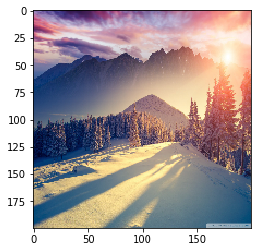

In [4]:
im = io.imread('/Applications/PICS/im.jpg')
im = cv2.resize(im, (200, 200))


plt.grid("off")
plt.imshow(im)

print im.shape

In [5]:
# Data preparation
data = im.reshape((-1, 3))
print data.shape

(40000, 3)


In [6]:
km = KMeans(n_clusters=16)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = km.predict(data)

In [8]:
new_pix = np.zeros_like(data)

for ix in range(new_pix.shape[0]):
    new_pix[ix, :] = km.cluster_centers_[labels[ix]].astype(np.uint8)

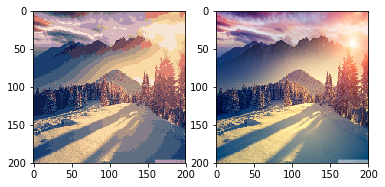

In [9]:
plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(new_pix.reshape(im.shape))

plt.subplot(1, 2, 2)
plt.grid("off")
plt.imshow(im)

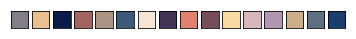

In [10]:
colors = km.cluster_centers_.astype(np.uint8)


for ix in range(colors.shape[0]):
    plt.subplot(1, colors.shape[0], ix+1)
    plt.grid("off")
    plt.xticks([])
    plt.yticks([])
    col = np.ones((100, 100, 3), dtype=np.uint8)
    col[:, :, :] = colors[ix]
    plt.imshow(col)